In [1]:
!/bin/bash ./setup.sh

SageMaker instance route table setup is ok. We are good to go.
SageMaker instance routing for Docker is ok. We are good to go!


In [2]:
import os
import sagemaker
from sagemaker import get_execution_role
import pandas as pd
import numpy as np

sagemaker_session = sagemaker.Session()

role = get_execution_role()
region = sagemaker_session.boto_session.region_name

In [3]:
# Specify your bucket name
bucket_name = 'tellisa-collage-gan'

training_folder = r'collage_gan/train'
test_folder = r'collage_gan/test'
model_folder = r'collage_gan/model/'

training_data_uri = r's3://' + bucket_name + r'/' + training_folder
testing_data_uri = r's3://' + bucket_name + r'/' + test_folder
model_data_uri = r's3://' + bucket_name + r'/' + model_folder

In [4]:
!pygmentize 'GAN_Script.py'

import argparse
import os 
import pandas as pd
import json

#import keras
#from keras.models import Sequential
#from keras.layers import Reshape
#from keras.layers import Flatten
#from keras.layers import Conv2D, Dense, Conv2DTranspose
#from keras.layers import Dropout
#from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
#tensorflow.config.run_functions_eagerly(True)


def model(args, x_train):
    
    adam = Adam(learning_rate=0.0002)
    # Function for Generator
    def build_generator():
        model = tf.keras.models.Sequential()

        # Layer 1
        model.add(tf.keras.layers.Dense(256 * 16* 16, input_dim=args.latent_dim)) # 128/2/2/2 because 3 conv2d layers?
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.Reshape((16,16,256)))

        # Layer 2
        model.add(tf.keras.layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    

In [5]:
from sagemaker.tensorflow import TensorFlow

In [6]:
#instance_type='ml.m5.xlarge'
instance_type='local'

In [7]:
estimator = TensorFlow(entry_point='GAN_Script.py',
                       role=role,
                       instance_count=1,
                       instance_type=instance_type,
                       framework_version='2.1.0',
                       py_version='py3',
                       output_path=model_data_uri,
                       base_job_name='tf-collage-gan',                       
                       distribution={'parameter_server': {'enabled': False}})

In [8]:
estimator.fit({'training':training_data_uri,'testing':testing_data_uri})

Creating tweisw4kmr-algo-1-8kl91 ... 
Creating tweisw4kmr-algo-1-8kl91 ... done
Attaching to tweisw4kmr-algo-1-8kl91
tweisw4kmr-algo-1-8kl91 | 2022-11-13 20:31:04,461 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
tweisw4kmr-algo-1-8kl91 | 2022-11-13 20:31:04,469 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
tweisw4kmr-algo-1-8kl91 | 2022-11-13 20:31:04,693 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
tweisw4kmr-algo-1-8kl91 | 2022-11-13 20:31:04,711 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
tweisw4kmr-algo-1-8kl91 | 2022-11-13 20:31:04,727 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
tweisw4kmr-algo-1-8kl91 | 2022-11-13 20:31:04,738 sagemaker-containers INFO     Invoking user script
tweisw4kmr-algo-1-8kl91 | 
tweisw4kmr-algo-1-8kl91 | Training Env:
tweisw4kmr-algo-1-8kl91 | 
tweisw4kmr-algo-1-8kl91 | {
tweisw4kmr-al

tweisw4kmr-algo-1-8kl91 | [3 2 2]
tweisw4kmr-algo-1-8kl91 | ******* 0 0 [D loss: 0.698796, acc: 50.00%] [G loss: 0.757459]
tweisw4kmr-algo-1-8kl91 | [19  5 13]
tweisw4kmr-algo-1-8kl91 | ******* 0 1 [D loss: 0.280999, acc: 100.00%] [G loss: 1.045186]
tweisw4kmr-algo-1-8kl91 | [15 14 16]
tweisw4kmr-algo-1-8kl91 | ******* 0 2 [D loss: 0.169694, acc: 100.00%] [G loss: 1.647346]
tweisw4kmr-algo-1-8kl91 | [ 3 15  3]
tweisw4kmr-algo-1-8kl91 | ******* 0 3 [D loss: 0.066747, acc: 100.00%] [G loss: 2.820760]
tweisw4kmr-algo-1-8kl91 | [10 14  4]
tweisw4kmr-algo-1-8kl91 | ******* 0 4 [D loss: 0.013722, acc: 100.00%] [G loss: 4.682048]
tweisw4kmr-algo-1-8kl91 | [ 3 16  3]
tweisw4kmr-algo-1-8kl91 | ******* 0 5 [D loss: 0.001498, acc: 100.00%] [G loss: 7.080829]
tweisw4kmr-algo-1-8kl91 | [15  2 12]
tweisw4kmr-algo-1-8kl91 | ******* 1 0 [D loss: 1.773667, acc: 66.67%] [G loss: 5.673097]
tweisw4kmr-algo-1-8kl91 | [ 3  5 11]
tweisw4kmr-algo-1-8kl91 | ******* 1 1 [D loss: 0.004228, acc: 100.00%] [G loss:

tweisw4kmr-algo-1-8kl91 | ******* 9 3 [D loss: 0.244560, acc: 83.33%] [G loss: 1.878029]
tweisw4kmr-algo-1-8kl91 | [ 2 14 18]
tweisw4kmr-algo-1-8kl91 | ******* 9 4 [D loss: 0.009568, acc: 100.00%] [G loss: 5.045330]
tweisw4kmr-algo-1-8kl91 | [ 5  3 14]
tweisw4kmr-algo-1-8kl91 | ******* 9 5 [D loss: 0.306936, acc: 83.33%] [G loss: 7.640699]
tweisw4kmr-algo-1-8kl91 | [11 12 19]
tweisw4kmr-algo-1-8kl91 | ******* 10 0 [D loss: 0.059088, acc: 100.00%] [G loss: 6.756971]
tweisw4kmr-algo-1-8kl91 | [ 9 14  3]
tweisw4kmr-algo-1-8kl91 | ******* 10 1 [D loss: 0.005225, acc: 100.00%] [G loss: 6.139997]
tweisw4kmr-algo-1-8kl91 | [16 11 12]
tweisw4kmr-algo-1-8kl91 | ******* 10 2 [D loss: 0.146426, acc: 100.00%] [G loss: 7.638848]
tweisw4kmr-algo-1-8kl91 | [ 4  2 11]
tweisw4kmr-algo-1-8kl91 | ******* 10 3 [D loss: 0.040981, acc: 100.00%] [G loss: 5.680105]
tweisw4kmr-algo-1-8kl91 | [11  5  0]
tweisw4kmr-algo-1-8kl91 | ******* 10 4 [D loss: 0.094186, acc: 100.00%] [G loss: 7.361309]
tweisw4kmr-algo-1-

tweisw4kmr-algo-1-8kl91 | ******* 19 0 [D loss: 0.282605, acc: 83.33%] [G loss: 2.567509]
tweisw4kmr-algo-1-8kl91 | [14 17 13]
tweisw4kmr-algo-1-8kl91 | ******* 19 1 [D loss: 0.135612, acc: 100.00%] [G loss: 4.406454]
tweisw4kmr-algo-1-8kl91 | [ 4  7 15]
tweisw4kmr-algo-1-8kl91 | ******* 19 2 [D loss: 0.212705, acc: 100.00%] [G loss: 4.584610]
tweisw4kmr-algo-1-8kl91 | [ 1 12  1]
tweisw4kmr-algo-1-8kl91 | ******* 19 3 [D loss: 0.108052, acc: 100.00%] [G loss: 5.145452]
tweisw4kmr-algo-1-8kl91 | [ 3 10  9]
tweisw4kmr-algo-1-8kl91 | ******* 19 4 [D loss: 0.229174, acc: 83.33%] [G loss: 5.255007]
tweisw4kmr-algo-1-8kl91 | [13  8  2]
tweisw4kmr-algo-1-8kl91 | ******* 19 5 [D loss: 0.373897, acc: 83.33%] [G loss: 2.900060]
tweisw4kmr-algo-1-8kl91 | 2022-11-13 20:40:54.325686: W tensorflow/python/util/util.cc:319] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
tweisw4kmr-algo-1-8kl91 | WARNING:tensorflow:From /usr/local/lib/py

In [9]:
predictor = estimator.deploy(initial_instance_count=1, instance_type=instance_type)

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Login Succeeded


WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store



Attaching to rzt4y6ckmn-algo-1-3yy69
rzt4y6ckmn-algo-1-3yy69 | INFO:__main__:starting services
rzt4y6ckmn-algo-1-3yy69 | INFO:__main__:using default model name: model
rzt4y6ckmn-algo-1-3yy69 | INFO:__main__:tensorflow serving model config: 
rzt4y6ckmn-algo-1-3yy69 | model_config_list: {
rzt4y6ckmn-algo-1-3yy69 |   config: {
rzt4y6ckmn-algo-1-3yy69 |     name: "model",
rzt4y6ckmn-algo-1-3yy69 |     base_path: "/opt/ml/model",
rzt4y6ckmn-algo-1-3yy69 |     model_platform: "tensorflow"
rzt4y6ckmn-algo-1-3yy69 |   }
rzt4y6ckmn-algo-1-3yy69 | }
rzt4y6ckmn-algo-1-3yy69 | 
rzt4y6ckmn-algo-1-3yy69 | 
rzt4y6ckmn-algo-1-3yy69 | INFO:__main__:nginx config: 
rzt4y6ckmn-algo-1-3yy69 | load_module modules/ngx_http_js_module.so;
rzt4y6ckmn-algo-1-3yy69 | 
rzt4y6ckmn-algo-1-3yy69 | worker_processes auto;
rzt4y6ckmn-algo-1-3yy69 | daemon off;
rzt4y6ckmn-algo-1-3yy69 | pid /tmp/nginx.pid;
rzt4y6ckmn-algo-1-3yy69 | error_log  /dev/stderr info;
rzt4y6ckmn-algo-1-3yy69 | 
rzt4y6ckmn-algo-1-3yy69 | worker_r

rzt4y6ckmn-algo-1-3yy69 | 2022-11-13 20:41:22.200851: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:152] Running initialization op on SavedModel bundle at path: /opt/ml/model/000000001
rzt4y6ckmn-algo-1-3yy69 | 2022-11-13 20:41:22.218281: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:333] SavedModel load for tags { serve }; Status: success: OK. Took 187777 microseconds.
rzt4y6ckmn-algo-1-3yy69 | 2022-11-13 20:41:22.220032: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /opt/ml/model/000000001/assets.extra/tf_serving_warmup_requests
rzt4y6ckmn-algo-1-3yy69 | 2022-11-13 20:41:22.221442: I tensorflow_serving/util/retrier.cc:46] Retrying of Loading servable: {name: model version: 1} exhausted max_num_retries: 0
rzt4y6ckmn-algo-1-3yy69 | 2022-11-13 20:41:22.221469: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: model version: 1}
rzt4y6ckmn-algo-1-3yy69 | 2022-11-13

In [10]:
noise = np.random.normal(0, 1, (16, 100))

In [11]:
result = predictor.predict(noise)

rzt4y6ckmn-algo-1-3yy69 | 2022/11/13 20:41:28 [warn] 15#15: *3 an upstream response is buffered to a temporary file /var/cache/nginx/proxy_temp/1/00/0000000001 while reading upstream, client: 172.18.0.1, server: , request: "POST /invocations HTTP/1.1", subrequest: "/v1/models/model:predict", upstream: "http://127.0.0.1:8501/v1/models/model:predict", host: "localhost:8080"
rzt4y6ckmn-algo-1-3yy69 | 172.18.0.1 - - [13/Nov/2022:20:41:28 +0000] "POST /invocations HTTP/1.1" 200 10577143 "-" "python-urllib3/1.26.8"


In [12]:
img = np.array(result['predictions'][2])

Matplotlib is building the font cache; this may take a moment.


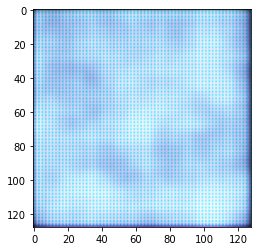

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [14]:
predictor.delete_endpoint()

Gracefully stopping... (press Ctrl+C again to force)
